In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
words = Table.read_table('data/wordle.csv')
words

Words
cigar
rebut
sissy
humph
awake
blush
focal
evade
naval
serve


In [3]:
np.unique(make_array(1, 2, 3, 2, 1))

array([1, 2, 3])

In [4]:
np.unique(make_array(list('baa')))

array(['a', 'b'], dtype=object)

In [5]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
counts = {}

for letter in alphabet:
    counts[letter] = 0

for word in words.column(0):
    nodups = np.unique(make_array(list(word)))
    for letter in alphabet:
        if letter in nodups:
            counts[letter] += 1

counts

{'a': 909,
 'b': 267,
 'c': 448,
 'd': 370,
 'e': 1056,
 'f': 207,
 'g': 300,
 'h': 379,
 'i': 647,
 'j': 27,
 'k': 202,
 'l': 648,
 'm': 298,
 'n': 550,
 'o': 673,
 'p': 346,
 'q': 29,
 'r': 837,
 's': 618,
 't': 667,
 'u': 457,
 'v': 149,
 'w': 194,
 'x': 37,
 'y': 417,
 'z': 35}

In [6]:
counts.keys()

dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [7]:
counts.values()

dict_values([909, 267, 448, 370, 1056, 207, 300, 379, 647, 27, 202, 648, 298, 550, 673, 346, 29, 837, 618, 667, 457, 149, 194, 37, 417, 35])

In [8]:
counts = Table().with_columns('Letter', counts.keys(), 'Counts', counts.values())
counts

Letter,Counts
a,909
b,267
c,448
d,370
e,1056
f,207
g,300
h,379
i,647
j,27


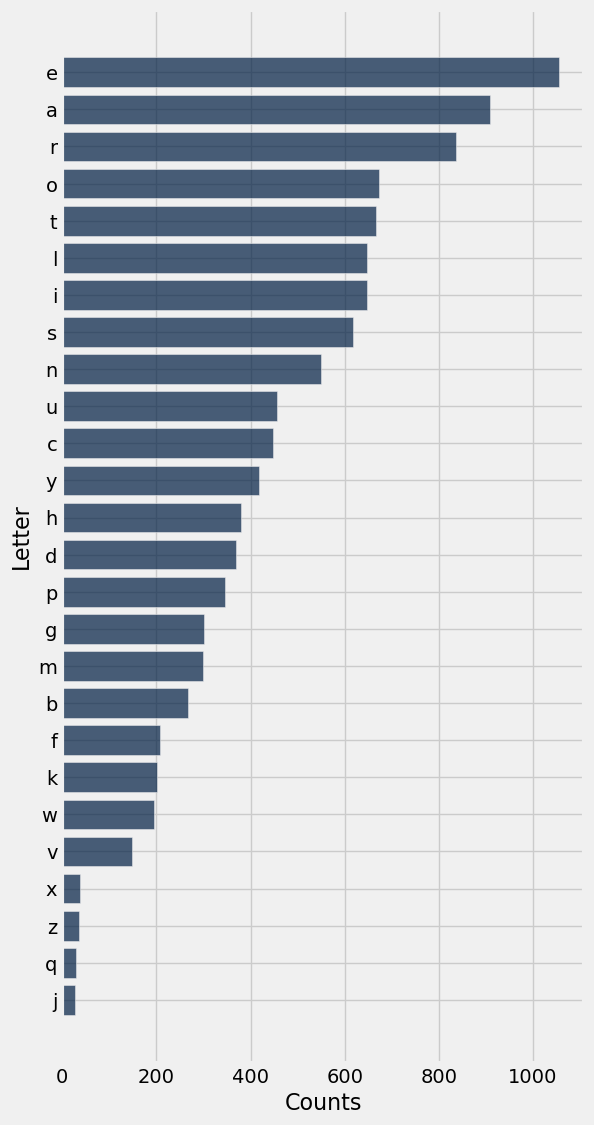

In [9]:
counts.sort('Counts', descending=True).barh('Letter')

In [10]:
counts.where('Letter', 'a').row(0).item(1)

909

In [11]:
def score(word):
    nodups = np.unique(make_array(list(word)))
    res = 0
    for letter in nodups:
        res += counts.where('Letter', letter).row(0).item(1)
    return res         

In [12]:
words = words.with_column('Score', words.apply(score, 'Words'))
words.sort('Score', descending=True)

Words,Score
later,4117
alter,4117
alert,4117
irate,4116
arose,4093
stare,4087
arise,4067
raise,4067
learn,4000
renal,4000
